Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00144: Experimental Methods in Civil Engineering


### Part I: Analysis
[6.   Extreme value distributions](#section_6)   

&nbsp;&nbsp;&nbsp;[6.1. Statistics of extreme values](#section_61)   
&nbsp;&nbsp;&nbsp;[6.2. Assimptotic distributions](#section_62)   
&nbsp;&nbsp;&nbsp;[6.3. Example of application](#section_63)   

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

## 6. Extreme value distributions <a name="section_6"></a>

### 6.1. Statistics of extreme values <a name="section_61"></a>

Extreme values is a concept usually required in engineering analysis for definition 
of either _characteristics loads_ and _caracteristic strengths_. The concept is required
whenever we want to know the statistical properties of the largest or the smallest
value of a set of $N$ random variables, all of them with the same probability 
distribution, which in this context is called the _origin distribution_.
Some examples of application are:

1. From a set of samples for the maximum annual wind speed at a given site,
   we wish to calculate the statistical properties of the maximum wind speed 
   in $N = 50$ years.
   
2. From a set of samples for the load capacity of a single pile, we wish to calculate
   the load capacity of a foundation block with $N = 4$ piles, considering that 
   the failure of one single pile will cause the failure of the whole foundation.

The mathematical formulation of this problem starts with definition of a set
of $N$ RV's, $\left\{ X_1, X_2, \dots, X_N \right\}$. Without loss of generality
we assume that these RV's are previously ordered, $X_1 \leq X_2 \leq \dots \leq X_N$.

#### Distribution of minima

The smallest value among $N$ implies that if $X_1$ is larger than $x$, than all
$X_i$, with $i > 1$, are also larger than $x$. This means that:

$$ {\rm Prob} \left\{ X_1 > x \right\} = 
   {\rm Prob} \left\{ \bigcap_{i = 1}^N {X_i > x} \right\}$$ 

If all $N$ RV's are _statistically independent_ and from the same distribution,
the expression above simplifies to:

$$ 1 - P_{X(1:N)}(x) = \left[ 1 - P_X(x) \right]^N $$

where $P_{X(1:N)}(x)$ means "cumulative distribution of the smallest among $N$".
The corresponding probability density function can be obtained by derivation:

$$ p_{X(1:N)}(x) = \frac{d}{dx} P_{X(1:N)}(x) = N p_X(x) \left[ 1 - P_X(x) \right]^{N-1} $$

#### Distribution of maxima

The largest value among $N$ implies that if $X_N$ is smaller than $x$, than all
$X_i$, with $i < N$, are also smaller than $x$. This means that:

$$ {\rm Prob} \left\{ X_N \leq x \right\} = 
   {\rm Prob} \left\{ \bigcap_{i = 1}^N {X_i \leq x} \right\}$$ 

If all $N$ RV's are _statistically independent_ and from the same distribution,
the expression above simplifies to:

$$ P_{X(N:N)}(x) = \left[ P_X(x) \right]^N $$

where $P_{X(N:N)}(x)$ means "cumulative distribution of the largest among $N$".
The corresponding probability density function can be obtained by derivation:

$$ p_{X(N:N)}(x) = \frac{d}{dx} P_{X(N:N)}(x) = N p_X(x) \left[ P_X(x) \right]^{N-1} $$

#### Example

The script below presents the distribution of the smallest and largest values for 
a set of $N$ standard Gaussian distribution. We create a custom RV for both cases:

In [2]:
class X_1N(st.rv_continuous):

    def __init__(self, N):
        self.N = N
        self.X = st.norm(0, 1)             # change this to change origin
        st.rv_continuous.__init__(self)
    
    def _cdf(self, x):
        return 1 - (1 - self.X.cdf(x))**self.N

In [3]:

class X_NN(st.rv_continuous):

    def __init__(self, N):
        self.N = N
        self.X = st.norm(0, 1)             # change this to change origin
        st.rv_continuous.__init__(self)
    
    def _cdf(self, x):
        return (self.X.cdf(x))**self.N

Now we calculate and plot the smallest and the largest for some values of $N$:

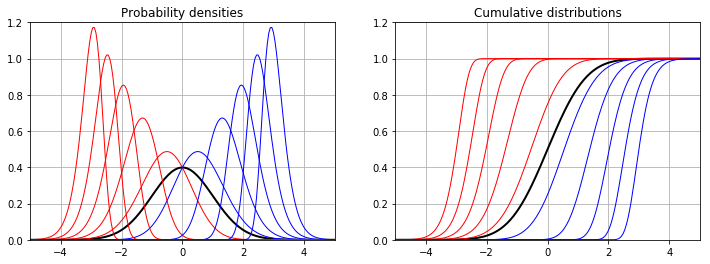

In [6]:
x   = np.linspace(-5, 5, 200)

X1  = X_1N(1)
f1  = plt.figure(1, figsize=(12, 4))

f11 = plt.subplot(1,2,1)
f1a = plt.plot(x, X1.pdf(x), 'k', lw=2)
f12 = plt.subplot(1,2,2)
f1b = plt.plot(x, X1.cdf(x), 'k', lw=2)

for k in [2, 8, 32, 128, 512]:
    
    X1  = X_1N(k)
    XN  = X_NN(k)

    f11 = plt.subplot(1,2,1)
    f1a = plt.plot(x, X1.pdf(x), 'r', lw=1)
    f1b = plt.plot(x, XN.pdf(x), 'b', lw=1)

    f12 = plt.subplot(1,2,2)
    f1a = plt.plot(x, X1.cdf(x), 'r', lw=1)
    f1b = plt.plot(x, XN.cdf(x), 'b', lw=1)


f11 = plt.subplot(1,2,1)
plt.axis([-5, 5, 0, 1.2])
plt.title('Probability densities')
plt.grid(True)

f12 = plt.subplot(1,2,2)
plt.axis([-5, 5, 0, 1.2])
plt.title('Cumulative distributions')
plt.grid(True)

It can be observed that the absolute mean value of the extreme distributions is increasing,
while the respective standard deviations are decreasing. It can be shown that this is 
a consequence of considering the independence of RV's in each set.

Expected value of smallest and largest can be easily calculated with the appropriate 
Python methods:


In [5]:
N  = 512

X1 = X_1N(N)
XN = X_NN(N)

print('Mean value of smallest among N is:         {0:6.3f}'.format(X1.mean()))
print('Standard deviation of smallest among N is: {0:6.3f}'.format(X1.std()),'\n')
print('Mean value of largest among N is:          {0:6.3f}'.format(XN.mean()))
print('Standard deviation of largest among N is:  {0:6.3f}'.format(XN.std()))


Mean value of smallest among N is:         -3.044
Standard deviation of smallest among N is:  0.370 

Mean value of largest among N is:           3.044
Standard deviation of largest among N is:   0.370


This calculation may take quite a large time to be performed.

## 6.2. Assimptotic distributions  <a name="section_62"></a>


## 6.3. Example of application <a name="section_63"></a>
